<a href="https://colab.research.google.com/github/NaumanAnwar97/ModelEvaluation/blob/main/Model_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv('./Sample4.csv')
df.head(5)

,M-Y,qty_ordered,sku_number,CPI,U.S. Dollar
0,7/1/2016,6,0,4.1,104.7381
1,7/1/2016,5,1,4.1,104.7381
2,7/1/2016,1,2,4.1,104.7381
3,7/1/2016,5,3,4.1,104.7381
4,7/1/2016,3,4,4.1,104.7381


In [29]:
df.isnull().any()

M-Y            False
qty_ordered    False
sku_number     False
CPI            False
U.S. Dollar    False
dtype: bool

In [30]:
df = df.loc[df['qty_ordered'] < df['qty_ordered'].quantile(0.99)]

In [31]:
target = df['qty_ordered']
df_1 = df.drop(['M-Y', 'qty_ordered'], axis = 1)
df_1.shape

(3551, 3)

In [32]:
df_1.columns

Index(['sku_number', 'CPI', 'U.S. Dollar'], dtype='object')

# Train-Test Split

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_1, target, test_size=0.3, random_state=122)

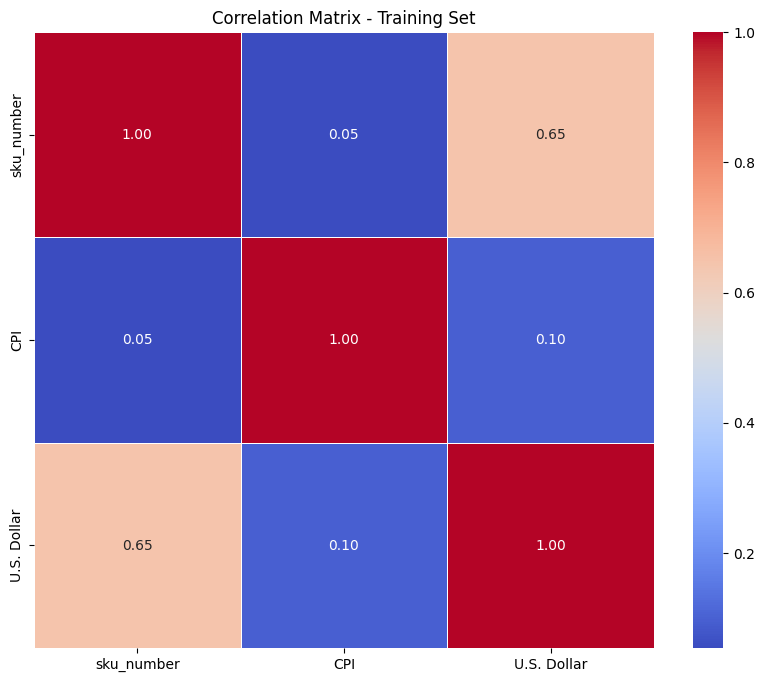

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix - Training Set")
plt.show()

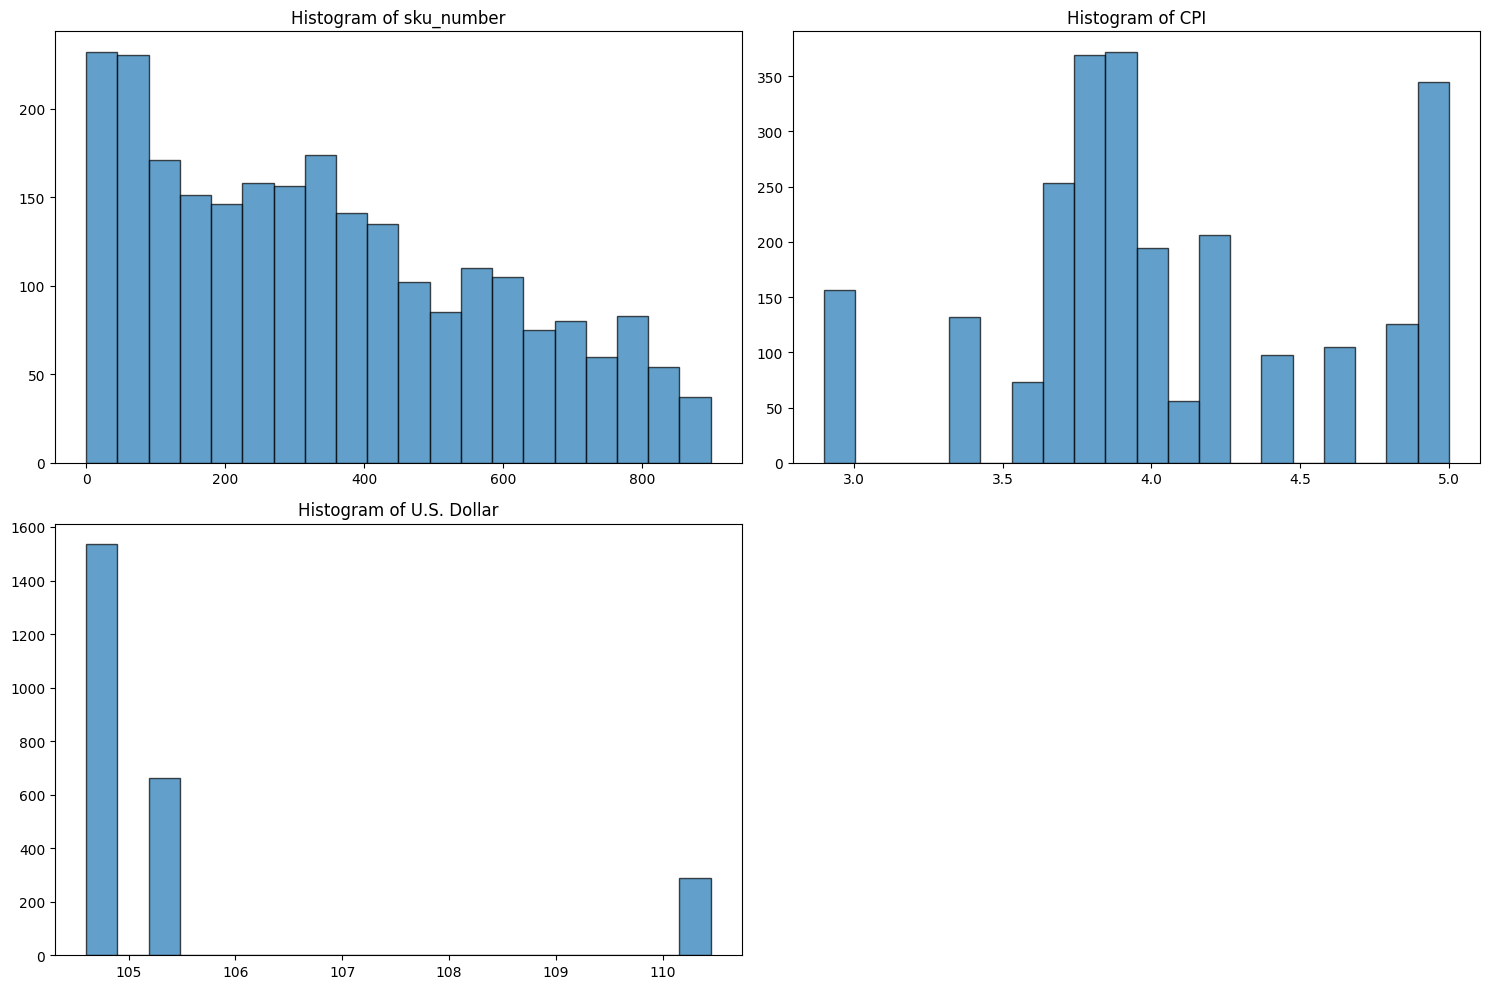

In [35]:
import matplotlib.pyplot as plt

# Assuming X_train is your training set
num_features = X_train.shape[1]  # Number of features

plt.figure(figsize=(15, 10))

for i in range(num_features):
    plt.subplot(2, 2, i + 1)  # Adjust the subplot layout based on the number of features
    plt.hist(X_train.iloc[:, i], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {X_train.columns[i]}')

plt.tight_layout()
plt.show()

# Linear Model

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_test_pred = regr.predict(X_test)
y_train_pred = regr.predict(X_train)

In [37]:
# Perform cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_results = cross_val_score(regr, df_1, target, cv=k_fold, scoring='neg_mean_squared_error')

# The result is negative mean squared error, so we take the negative to get positive MSE
cross_val_rmse = np.sqrt(-cross_val_results)

# Print the cross-validation results
print(f'Cross-Validation RMSE: {cross_val_rmse}')
print(f'Mean RMSE: {np.mean(cross_val_rmse)}')

Cross-Validation RMSE: [37.3103333  39.40802189 42.77359461 39.07270495 43.79200845]
Mean RMSE: 40.47133263835108


In [38]:
import numpy as np
# The coefficients
print("Coefficients: \n", regr.coef_)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_test_pred))
print("Coefficient of determination: %.2f" % r2_score(y_train, y_train_pred))

Coefficients: 
 [ 0.07213956 -1.70662798 -6.32877065]
Coefficient of determination: 0.06
Coefficient of determination: 0.10


In [39]:
from sklearn.model_selection import permutation_test_score
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(2, shuffle=True, random_state=0)
# Permutation test for the linear model

score_sales, perm_scores_sales, pvalue_IVs = permutation_test_score(
    regr, df_1, target, cv=cv, n_permutations=1000)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

In [40]:
print(pvalue_IVs)
print(score_sales)

0.000999000999000999
0.08530868795957408


In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Mean Absolute Error
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f'Train Mean Absolute Error: {mae_train}')
print(f'Test Mean Absolute Error: {mae_test}')

# Mean Squared Error
mse = (mean_squared_error(y_test, y_test_pred))
mse_train = (mean_squared_error(y_train, y_train_pred))
print(f'Mean Squared Error on test: {mse_train}')
print(f'Mean Squared Error on test: {mse}')

from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for both sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'RMSE on Training Set: {rmse_train}')
print(f'RMSE on Testing Set: {rmse_test}')


Train Mean Absolute Error: 23.657953865114575
Test Mean Absolute Error: 24.516260115460405
Mean Squared Error on test: 1575.4609644602897
Mean Squared Error on test: 1786.545600533201
RMSE on Training Set: 39.69207684740482
RMSE on Testing Set: 42.267547841496565


#  Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()
clf.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
y_testModel_pred = clf.predict(X_test)

# Make predictions using training set
y_trainModel_pred = clf.predict(X_train)

In [44]:
# Mean Absolute Error
RFmae_train = mean_absolute_error(y_train, y_trainModel_pred)
RFmae_test = mean_absolute_error(y_test, y_testModel_pred)

print(f'Train Mean Absolute Error: {RFmae_train}')
print(f'Test Mean Absolute Error: {RFmae_test}')

# Mean Squared Error
RFmse = (mean_squared_error(y_test, y_testModel_pred))
RFmse_train = (mean_squared_error(y_train, y_trainModel_pred))
print(f'Mean Squared Error on test: {RFmse_train}')
print(f'Mean Squared Error on test: {RFmse}')

from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for both sets
RFrmse_train = np.sqrt(mean_squared_error(y_train, y_trainModel_pred))
RFrmse_test = np.sqrt(mean_squared_error(y_test, y_testModel_pred))

print(f'RMSE on Training Set: {RFrmse_train}')
print(f'RMSE on Testing Set: {RFrmse_test}')

Train Mean Absolute Error: 7.443541247484908
Test Mean Absolute Error: 20.568123827392117
Mean Squared Error on test: 197.52802156941652
Mean Squared Error on test: 1445.6761013133207
RMSE on Training Set: 14.054466249894249
RMSE on Testing Set: 38.02204756865838


# XGBoost

In [45]:
%pip install xgboost

In [46]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


# XGBoost regression model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10, random_state=42)

# Train the model
xg_reg.fit(X_train, y_train)

# Predictions on the testing set
y_train_pred_xg = xg_reg.predict(X_train)
y_test_pred_xg = xg_reg.predict(X_test)

# Calculate metrics

mae_trainxg = mean_absolute_error(y_train, y_train_pred_xg)
mse_trainxg = mean_squared_error(y_train, y_train_pred_xg)
rmse_trainxg = np.sqrt(mse_trainxg)

mae_xg = mean_absolute_error(y_test, y_test_pred_xg)
mse_xg = mean_squared_error(y_test, y_test_pred_xg)
rmse_xg = np.sqrt(mse_xg)

print(f'XGBoost Mean Absolute Error: {mae_trainxg}')
print(f'XGBoost Mean Absolute Error: {mae_xg}')
print(f'XGBoost Mean Squared Error: {mse_trainxg}')
print(f'XGBoost Mean Squared Error: {mse_xg}')
print(f'XGBoost Root Mean Squared Error: {rmse_trainxg}')
print(f'XGBoost Root Mean Squared Error: {rmse_xg}')

XGBoost Mean Absolute Error: 22.425195709320622
XGBoost Mean Absolute Error: 23.32522096687589
XGBoost Mean Squared Error: 1428.628415591058
XGBoost Mean Squared Error: 1635.3921647203238
XGBoost Root Mean Squared Error: 37.79720116081425
XGBoost Root Mean Squared Error: 40.43998225420387


# K-Nearest Neighbours

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


knn = KNeighborsRegressor(n_neighbors=5)  # Example with 5 neighbors

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

# Calculate metrics
mae_trainknn = mean_absolute_error(y_train, y_train_pred_knn)
mse_trainknn = mean_squared_error(y_train, y_train_pred_knn)
rmse_trainknn = np.sqrt(mse_trainknn)

mae_knn = mean_absolute_error(y_test, y_test_pred_knn)
mse_knn = mean_squared_error(y_test, y_test_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print(f'KNN Mean Absolute Error Train: {mae_trainknn}')
print(f'KNN Mean Absolute Error Test: {mae_knn}')
print(f'KNN Mean Squared Error Train: {mse_trainknn}')
print(f'KNN Mean Squared Error Test: {mse_knn}')
print(f'KNN Root Mean Squared Error Train: {rmse_trainknn}')
print(f'KNN Root Mean Squared Error Test: {rmse_knn}')

KNN Mean Absolute Error Train: 17.940845070422537
KNN Mean Absolute Error Test: 22.728330206378985
KNN Mean Squared Error Train: 955.6464064386317
KNN Mean Squared Error Test: 1582.8500562851782
KNN Root Mean Squared Error Train: 30.913531122125658
KNN Root Mean Squared Error Test: 39.785048149841145


# Support Vector Regressor (SVR)

In [48]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

svm_model = SVR(kernel='linear')

svm_model.fit(X_train, y_train)


y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

mae_trainsvm = mean_absolute_error(y_train, y_train_pred_svm)
mse_trainsvm = mean_squared_error(y_train, y_train_pred_svm)
rmse_trainsvm = np.sqrt(mse_trainsvm)

mae_svm = mean_absolute_error(y_test, y_test_pred_svm)
mse_svm = mean_squared_error(y_test, y_test_pred_svm)
rmse_svm = np.sqrt(mse_svm)

print(f'SVM Mean Absolute Error Train: {mae_trainsvm}')
print(f'SVM Mean Absolute Error Test: {mae_svm}')
print(f'SVM Mean Squared Error Train: {mse_trainsvm}')
print(f'SVM Mean Squared Error Test: {mse_svm}')
print(f'SVM Root Mean Squared Error Train: {rmse_trainsvm}')
print(f'SVM Root Mean Squared Error Test: {rmse_svm}')

SVM Mean Absolute Error Train: 20.405079330375088
SVM Mean Absolute Error Test: 20.980472645047406
SVM Mean Squared Error Train: 1811.6605707720578
SVM Mean Squared Error Test: 2001.4546197044474
SVM Root Mean Squared Error Train: 42.56360617678039
SVM Root Mean Squared Error Test: 44.73761973668746


# Neural Networks (Deep Learning Model)

In [49]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer with linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=300, batch_size=32, validation_split=0.3)

# Predictions on the testing set
y_test_pred_nn = model.predict(X_test_scaled).flatten()

# Calculate metrics
mae_nn = mean_absolute_error(y_test, y_test_pred_nn)
mse_nn = mean_squared_error(y_test, y_test_pred_nn)
rmse_nn = np.sqrt(mse_nn)

print(f'Neural Network Mean Absolute Error: {mae_nn}')
print(f'Neural Network Mean Squared Error: {mse_nn}')
print(f'Neural Network Root Mean Squared Error: {rmse_nn}')


Epoch 1/300
55/55 [==============================] - 2s 14ms/step - loss: 2300.9033 - val_loss: 2459.1797
Epoch 2/300
55/55 [==============================] - 0s 4ms/step - loss: 2231.1907 - val_loss: 2355.7920
Epoch 3/300
55/55 [==============================] - 0s 4ms/step - loss: 2094.0708 - val_loss: 2163.3860
Epoch 4/300
55/55 [==============================] - 0s 5ms/step - loss: 1887.7975 - val_loss: 1932.8677
Epoch 5/300
55/55 [==============================] - 0s 5ms/step - loss: 1711.7020 - val_loss: 1786.2539
Epoch 6/300
55/55 [==============================] - 0s 5ms/step - loss: 1623.3398 - val_loss: 1714.8750
Epoch 7/300
55/55 [==============================] - 0s 4ms/step - loss: 1580.1626 - val_loss: 1678.8903
Epoch 8/300
55/55 [==============================] - 0s 5ms/step - loss: 1558.2313 - val_loss: 1657.5660
Epoch 9/300
55/55 [==============================] - 0s 6ms/step - loss: 1541.0833 - val_loss: 1641.4668
Epoch 10/300
55/55 [==============================] - 

## Now we'll Introduce Customer Reviews into the Model and Check Whether the Model Performance Improves?

In [76]:
newDf = pd.read_csv('./Sample5.csv')
newDf.head(5)

,M-Y,qty_ordered,sku_number,CPI,U.S. Dollar,remarks,remarks_coded
0,7/1/2016,6,0,4.1,104.7381,positive,1
1,7/1/2016,5,1,4.1,104.7381,average,0
2,7/1/2016,1,2,4.1,104.7381,negative,-1
3,7/1/2016,5,3,4.1,104.7381,average,0
4,7/1/2016,3,4,4.1,104.7381,average,0


In [77]:
newDf = newDf.loc[newDf['qty_ordered'] < newDf['qty_ordered'].quantile(0.99)]

In [78]:
Dv = newDf['qty_ordered']
IVs = newDf.drop(['M-Y', 'qty_ordered', 'remarks'], axis = 1)
IVs.columns

Index(['sku_number', 'CPI', 'U.S. Dollar', 'remarks_coded'], dtype='object')

In [79]:
X_trn, X_tst, y_trn, y_tst = train_test_split(IVs, Dv, test_size=0.3, random_state=122)

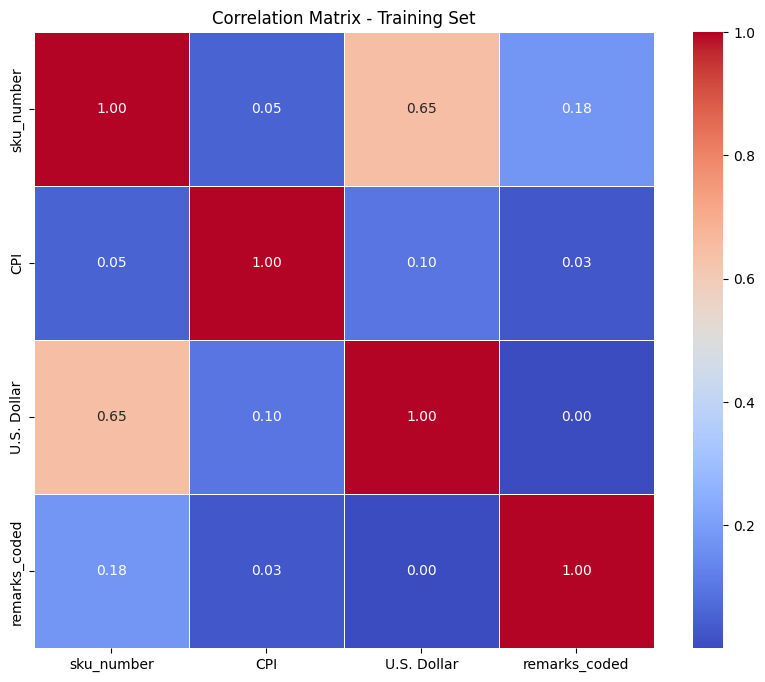

In [80]:
# Correlation Matrix
correlation_matrix = X_trn.corr()

# Plotting the correlation matrix using seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix - Training Set")
plt.show()

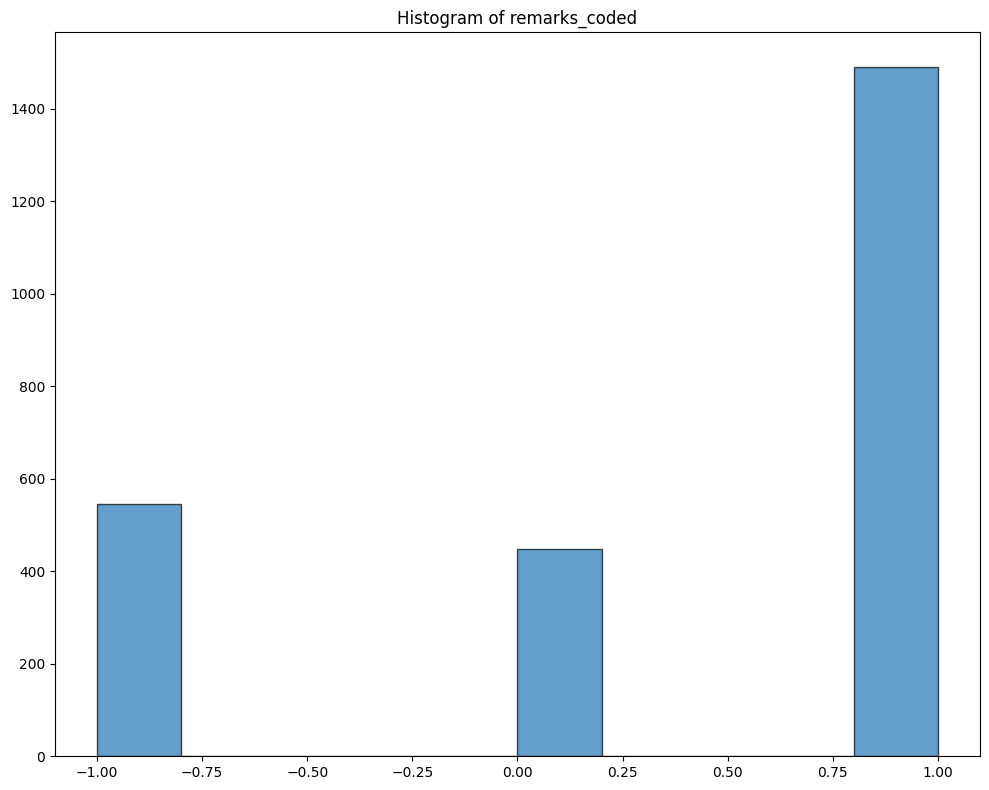

In [82]:
plt.figure(figsize=(10, 8))
plt.hist(X_trn['remarks_coded'], bins=10, edgecolor='black', alpha=0.7)
plt.title(f'Histogram of {X_trn.columns[3]}')

plt.tight_layout()
plt.show()

# Linear Model

In [83]:
# Create linear regression object
regr2 = linear_model.LinearRegression()
regr2.fit(X_trn, y_trn)
y_tst_pred = regr2.predict(X_tst)
y_trn_pred = regr2.predict(X_trn)

## Linear Model With Cross Validation

In [84]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=52)

cross_val_results2 = cross_val_score(regr2, IVs, Dv, cv=k_fold, scoring='neg_mean_squared_error')

# The result is negative mean squared error, so we take the negative to get positive MSE
cross_val_rmse2 = np.sqrt(-cross_val_results2)

# Print the cross-validation results
print(f'Cross-Validation RMSE: {cross_val_rmse2}')
print(f'Mean RMSE: {np.mean(cross_val_rmse2)}')

Cross-Validation RMSE: [34.73630259 37.24275583 36.36242613 36.33775983 42.23036053 32.81604582
 44.57489027 31.79923121 40.12406269 39.51479008]
Mean RMSE: 37.57386250036361


In [85]:
# The coefficients
print("Coefficients: \n", regr2.coef_)
print("Coefficient of determination: %.2f" % r2_score(y_tst, y_tst_pred))
print("Coefficient of determination: %.2f" % r2_score(y_trn, y_trn_pred))

Coefficients: 
 [ 0.05328022 -2.51375791 -4.64271748 18.0608216 ]
Coefficient of determination: 0.18
Coefficient of determination: 0.22


In [86]:
# Mean Absolute Error
mae_trn = mean_absolute_error(y_trn, y_trn_pred)
mae_tst = mean_absolute_error(y_tst, y_tst_pred)

print(f'Train Mean Absolute Error: {mae_trn}')
print(f'Test Mean Absolute Error: {mae_tst}')

# Mean Squared Error
mse2 = (mean_squared_error(y_tst, y_tst_pred))
mse_trn = (mean_squared_error(y_trn, y_trn_pred))
print(f'Mean Squared Error on test: {mse_trn}')
print(f'Mean Squared Error on test: {mse2}')

# Calculate RMSE for both sets
rmse_trn = np.sqrt(mean_squared_error(y_trn, y_trn_pred))
rmse_tst = np.sqrt(mean_squared_error(y_tst, y_tst_pred))

print(f'RMSE on Training Set: {rmse_trn}')
print(f'RMSE on Testing Set: {rmse_tst}')


Train Mean Absolute Error: 21.389251056029288
Test Mean Absolute Error: 22.80797648277928
Mean Squared Error on test: 1367.7070565154177
Mean Squared Error on test: 1554.9459357053197
RMSE on Training Set: 36.98252366341997
RMSE on Testing Set: 39.43280278784808


# Random Forest Regressor

In [87]:
clf.fit(X_trn, y_trn)

RandomForestRegressor()

In [88]:
# Make predictions using training and testing set
y_tstModel_pred = clf.predict(X_tst)
y_trnModel_pred = clf.predict(X_trn)

In [89]:
# Mean Absolute Error
RFmae_trn = mean_absolute_error(y_trn, y_trnModel_pred)
RFmae_tst = mean_absolute_error(y_tst, y_tstModel_pred)

print(f'Train Mean Absolute Error: {RFmae_trn}')
print(f'Test Mean Absolute Error: {RFmae_tst}')

# Mean Squared Error
RFmse2 = (mean_squared_error(y_tst, y_tstModel_pred))
RFmse_trn = (mean_squared_error(y_trn, y_trnModel_pred))
print(f'Mean Squared Error on test: {RFmse_trn}')
print(f'Mean Squared Error on test: {RFmse2}')

# Calculate RMSE for both sets
RFrmse_trn = np.sqrt(mean_squared_error(y_trn, y_trnModel_pred))
RFrmse_tst = np.sqrt(mean_squared_error(y_tst, y_tstModel_pred))

print(f'RMSE on Training Set: {RFrmse_trn}')
print(f'RMSE on Testing Set: {RFrmse_tst}')

Train Mean Absolute Error: 6.392346076458752
Test Mean Absolute Error: 17.869784240150096
Mean Squared Error on test: 182.93720394366196
Mean Squared Error on test: 1360.213648686679
RMSE on Training Set: 13.525428050293343
RMSE on Testing Set: 36.881074397130554


# XGBoost

In [90]:
# XGBoost regression model
xg_reg2 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10, random_state=42)

# Train the model
xg_reg2.fit(X_trn, y_trn)

# Predictions on the testing set
y_trn_pred_xg = xg_reg2.predict(X_trn)
y_tst_pred_xg = xg_reg2.predict(X_tst)

# Calculate metrics

mae_trnxg = mean_absolute_error(y_trn, y_trn_pred_xg)
mse_trnxg = mean_squared_error(y_trn, y_trn_pred_xg)
rmse_trnxg = np.sqrt(mse_trnxg)

mae_xg2 = mean_absolute_error(y_tst, y_tst_pred_xg)
mse_xg2 = mean_squared_error(y_tst, y_tst_pred_xg)
rmse_xg2 = np.sqrt(mse_xg2)

print(f'XGBoost Mean Absolute Error: {mae_trnxg}')
print(f'XGBoost Mean Absolute Error: {mae_xg2}')
print(f'XGBoost Mean Squared Error: {mse_trnxg}')
print(f'XGBoost Mean Squared Error: {mse_xg2}')
print(f'XGBoost Root Mean Squared Error: {rmse_trnxg}')
print(f'XGBoost Root Mean Squared Error: {rmse_xg2}')

XGBoost Mean Absolute Error: 21.069082681130116
XGBoost Mean Absolute Error: 21.979827030067373
XGBoost Mean Squared Error: 1367.2166999709602
XGBoost Mean Squared Error: 1547.848636408143
XGBoost Root Mean Squared Error: 36.97589349793944
XGBoost Root Mean Squared Error: 39.34270753784166


# K-Nearest Neighbours

In [91]:
knn2 = KNeighborsRegressor(n_neighbors=3)

knn2.fit(X_trn, y_trn)

y_trn_pred_knn = knn2.predict(X_trn)
y_tst_pred_knn = knn2.predict(X_tst)


mae_trnknn = mean_absolute_error(y_trn, y_trn_pred_knn)
mse_trnknn = mean_squared_error(y_trn, y_trn_pred_knn)
rmse_trnknn = np.sqrt(mse_trnknn)

mae_knn2 = mean_absolute_error(y_tst, y_tst_pred_knn)
mse_knn2 = mean_squared_error(y_tst, y_tst_pred_knn)
rmse_knn2 = np.sqrt(mse_knn2)

print(f'KNN Mean Absolute Error Train: {mae_trnknn}')
print(f'KNN Mean Absolute Error Test: {mae_knn2}')
print(f'KNN Mean Squared Error Train: {mse_trnknn}')
print(f'KNN Mean Squared Error Test: {mse_knn2}')
print(f'KNN Root Mean Squared Error Train: {rmse_trnknn}')
print(f'KNN Root Mean Squared Error Test: {rmse_knn2}')

KNN Mean Absolute Error Train: 13.758417169684774
KNN Mean Absolute Error Test: 20.907442151344593
KNN Mean Squared Error Train: 712.150816007154
KNN Mean Squared Error Test: 1523.9001459245364
KNN Root Mean Squared Error Train: 26.68615401302994
KNN Root Mean Squared Error Test: 39.03716365112271


# Support Vector Regressor

In [92]:

svm_model2 = SVR(kernel='linear')

svm_model2.fit(X_trn, y_trn)


y_trn_pred_svm = svm_model2.predict(X_trn)
y_tst_pred_svm = svm_model2.predict(X_tst)

mae_trnsvm = mean_absolute_error(y_trn, y_trn_pred_svm)
mse_trnsvm = mean_squared_error(y_trn, y_trn_pred_svm)
rmse_trnsvm = np.sqrt(mse_trnsvm)

mae_svm2 = mean_absolute_error(y_tst, y_tst_pred_svm)
mse_svm2 = mean_squared_error(y_tst, y_tst_pred_svm)
rmse_svm2 = np.sqrt(mse_svm2)

print(f'SVM Mean Absolute Error Train: {mae_trnsvm}')
print(f'SVM Mean Absolute Error Test: {mae_svm2}')
print(f'SVM Mean Squared Error Train: {mse_trnsvm}')
print(f'SVM Mean Squared Error Test: {mse_svm2}')
print(f'SVM Root Mean Squared Error Train: {rmse_trnsvm}')
print(f'SVM Root Mean Squared Error Test: {rmse_svm2}')

SVM Mean Absolute Error Train: 17.77888849730035
SVM Mean Absolute Error Test: 18.48561944511453
SVM Mean Squared Error Train: 1649.5244733296342
SVM Mean Squared Error Test: 1816.216122085793
SVM Root Mean Squared Error Train: 40.61433827270407
SVM Root Mean Squared Error Test: 42.61708720790046


# Neural Networks (Deep Learning Model)

In [93]:
scaler2 = StandardScaler()
X_trn_scaled = scaler2.fit_transform(X_trn)
X_tst_scaled = scaler2.transform(X_tst)


model = Sequential()
model.add(Dense(32, input_dim=X_trn_scaled.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_trn_scaled, y_trn, epochs=300, batch_size=32, validation_split=0.3)

# Predictions on the testing set
y_tst_pred_nn = model.predict(X_tst_scaled).flatten()

# Calculate metrics
mae_nn2 = mean_absolute_error(y_tst, y_tst_pred_nn)
mse_nn2 = mean_squared_error(y_tst, y_tst_pred_nn)
rmse_nn2 = np.sqrt(mse_nn2)

print(f'Neural Network Mean Absolute Error: {mae_nn2}')
print(f'Neural Network Mean Squared Error: {mse_nn2}')
print(f'Neural Network Root Mean Squared Error: {rmse_nn2}')

Epoch 1/300
55/55 [==============================] - 1s 7ms/step - loss: 2305.2971 - val_loss: 2463.4426
Epoch 2/300
55/55 [==============================] - 0s 4ms/step - loss: 2234.8967 - val_loss: 2356.0750
Epoch 3/300
55/55 [==============================] - 0s 4ms/step - loss: 2092.3909 - val_loss: 2141.2727
Epoch 4/300
55/55 [==============================] - 0s 4ms/step - loss: 1843.4839 - val_loss: 1836.6519
Epoch 5/300
55/55 [==============================] - 0s 4ms/step - loss: 1572.5608 - val_loss: 1587.5640
Epoch 6/300
55/55 [==============================] - 0s 4ms/step - loss: 1419.0270 - val_loss: 1465.4048
Epoch 7/300
55/55 [==============================] - 0s 3ms/step - loss: 1352.8711 - val_loss: 1420.1505
Epoch 8/300
55/55 [==============================] - 0s 3ms/step - loss: 1317.3082 - val_loss: 1398.0001
Epoch 9/300
55/55 [==============================] - 0s 4ms/step - loss: 1299.5642 - val_loss: 1386.7913
Epoch 10/300
55/55 [==============================] - 0